In [87]:
import pandas as pd
import numpy as np
import time
import random
from datetime import datetime, timedelta

In [88]:
full_set = pd.read_json('Final_for_ppt.json')

In [89]:
full_set

,Ewma_Nega_pct_change,Ewma_Posi_pct_change,ewma_close_pct_change
2015-01-02,-0.140963,-0.508982,0.005729
2015-01-03,0.389867,0.717902,-0.125332
2015-01-04,0.173619,0.268833,-0.139060
2015-01-05,-0.088608,0.063554,-0.067878
2015-01-06,0.090262,0.535397,-0.024764
2015-01-07,0.477102,0.413086,-0.005168
2015-01-08,0.308270,0.377644,-0.020627
2015-01-09,0.247385,0.249281,-0.006941
2015-01-10,0.307889,0.286636,-0.025818
2015-01-11,0.277774,0.290133,-0.034925


In [90]:
for d in full_set.index:
    try:
        if full_set.loc[(d+timedelta(days=10)),'ewma_close_pct_change'] > 0 :
            full_set.loc[d,'ewma_10d_pct_change'] = 'P'
        else:
            if full_set.loc[(d+timedelta(days=10)),'ewma_close_pct_change'] < 0:
                full_set.loc[d,'ewma_10d_pct_change'] = 'N'          
    except:
        full_set.drop(d,axis=0,inplace = True)
        print(d)

2015-01-04 00:00:00
2015-01-05 00:00:00
2016-03-09 00:00:00
2016-03-10 00:00:00
2016-04-10 00:00:00
2016-04-11 00:00:00
2016-07-23 00:00:00
2016-07-24 00:00:00
2016-09-13 00:00:00
2016-09-14 00:00:00
2016-12-06 00:00:00
2016-12-07 00:00:00
2017-02-16 00:00:00
2017-02-17 00:00:00
2017-03-10 00:00:00
2017-03-11 00:00:00
2017-04-17 00:00:00
2017-04-18 00:00:00
2017-12-21 00:00:00
2017-12-22 00:00:00
2017-12-23 00:00:00
2017-12-24 00:00:00
2017-12-25 00:00:00
2017-12-26 00:00:00
2017-12-27 00:00:00
2017-12-28 00:00:00
2017-12-29 00:00:00
2017-12-30 00:00:00


In [91]:
%matplotlib inline
import matplotlib.pyplot as plt

In [92]:
train_set= full_set.loc['2015-02-05':'2017-05-05']
test_set = full_set.loc['2017-05-06':'2017-12-20']

In [93]:
X = train_set[['Ewma_Nega_pct_change','Ewma_Posi_pct_change']]
Y = train_set['ewma_10d_pct_change']
Xt = test_set[['Ewma_Nega_pct_change','Ewma_Posi_pct_change']]
Yt = test_set['ewma_10d_pct_change']

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [96]:
#cross validation
scores_2 = cross_val_score(lr, X, Y,
                         scoring="accuracy", cv=3)
display_scores(scores_2)

Scores: [ 0.80988593  0.80988593  0.77186312]
Mean: 0.79721166033
Standard deviation: 0.0179241262658


In [97]:
#we got very high accuracy, but look at the data we will find it is very imbalanced, so we need to look at Confusion Matrix
#the accuracy just show the number of right prediction among prediction, we should use recall,also called sensitivity or true positive rate

In [98]:
#get the predict result 
from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(lr, X, Y, cv=3)
Y_train_pred

array(['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P

In [99]:
#compare the predict and the actual label with confusion matrix
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(Y, Y_train_pred)
c_matrix
#this matix means that for 150 actual 'N'(go down) we predict correct 0 of them, for 629 'P'(go up) we predict 619 correct

array([[  0, 150],
       [ 10, 629]], dtype=int64)

In [100]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0 150]
 [ 10 629]]


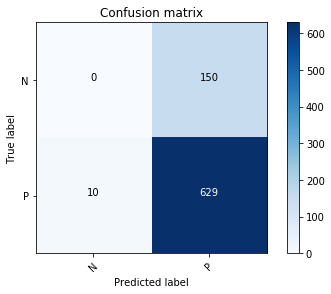

In [101]:
plt.figure()
plot_confusion_matrix(c_matrix, classes=['N','P'],
                      title='Confusion matrix')
plt.show()
##this matix means that for 150 actual 'N'(go down) we predict correctly 0 of them, for 629 'P'(go up) we predict 619 of them correctly
#shows that its model hard to handel the N cases.

In [102]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
Y = np.array([i[0] for i in lb.fit_transform(Y)])

In [103]:
Y_train_pred = np.array([i[0] for i in lb.fit_transform(Y_train_pred)])

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(Y, Y_train_pred)

0.80744544287548137

In [105]:
#this is the ratio of positive instances(up) that are correctly detected by the classifier.
#TP/TP+FN
recall_score(Y, Y_train_pred) 

0.98435054773082942

In [106]:
#the F1 score is the harmonic mean of precision and recall
#Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values
f1_score(Y, Y_train_pred)

0.88716502115655849

In [12]:
# other try of random forest and else:
full_set2 = pd.read_json('Final_for_ppt.json')

In [13]:
for d in full_set2.index:
    try:
        full_set2.loc[d,'ewma_10d_pct_change'] = full_set2.loc[(d+timedelta(days=10)),'ewma_close_pct_change']
    except:
        full_set2.drop(d,axis=0,inplace = True)
        print(d)

2015-01-04 00:00:00
2015-01-05 00:00:00
2016-03-09 00:00:00
2016-03-10 00:00:00
2016-04-10 00:00:00
2016-04-11 00:00:00
2016-07-23 00:00:00
2016-07-24 00:00:00
2016-09-13 00:00:00
2016-09-14 00:00:00
2016-12-06 00:00:00
2016-12-07 00:00:00
2017-02-16 00:00:00
2017-02-17 00:00:00
2017-03-10 00:00:00
2017-03-11 00:00:00
2017-04-17 00:00:00
2017-04-18 00:00:00
2017-12-21 00:00:00
2017-12-22 00:00:00
2017-12-23 00:00:00
2017-12-24 00:00:00
2017-12-25 00:00:00
2017-12-26 00:00:00
2017-12-27 00:00:00
2017-12-28 00:00:00
2017-12-29 00:00:00
2017-12-30 00:00:00


In [14]:
full_set2

,Ewma_Nega_pct_change,Ewma_Posi_pct_change,ewma_close_pct_change,ewma_10d_pct_change
2015-01-02,-0.140963,-0.508982,0.005729,-0.027557
2015-01-03,0.389867,0.717902,-0.125332,-0.079095
2015-01-06,0.090262,0.535397,-0.024764,-0.115739
2015-01-07,0.477102,0.413086,-0.005168,-0.136854
2015-01-08,0.308270,0.377644,-0.020627,-0.062869
2015-01-09,0.247385,0.249281,-0.006941,-0.041153
2015-01-10,0.307889,0.286636,-0.025818,-0.046811
2015-01-11,0.277774,0.290133,-0.034925,0.004163
2015-01-12,0.213303,0.252551,-0.027557,0.016511
2015-01-13,0.343404,0.208050,-0.079095,0.014093


In [15]:
train_set2= full_set2.loc['2015-02-05':'2017-04-05']
test_set2 = full_set2.loc['2017-04-06':'2017-12-20']

In [16]:
X2 = train_set2[['Ewma_Nega_pct_change','Ewma_Posi_pct_change']]
Y2 = train_set2['ewma_10d_pct_change']
Xt2 = test_set2[['Ewma_Nega_pct_change','Ewma_Posi_pct_change']]
Yt2 = test_set2['ewma_10d_pct_change']

In [17]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X2,Y2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
scores_RFR = cross_val_score(RFR, X2, Y2,
                         scoring="neg_mean_squared_error", cv=5)
display_scores(scores_RFR)

Scores: [-0.00023386 -0.00027901 -0.0002113  -0.00017588 -0.00011467]
Mean: -0.000202944125867
Standard deviation: 5.53825102993e-05


In [25]:
test_set2.predict = RFR.predict(Xt2)

In [27]:
test_set2

,Ewma_Nega_pct_change,Ewma_Posi_pct_change,ewma_close_pct_change,ewma_10d_pct_change
2017-04-06,0.764084,0.503333,0.008225,0.004194
2017-04-07,0.758017,0.469964,0.007276,0.004639
2017-04-08,0.726582,0.456315,0.006719,0.005488
2017-04-09,0.683530,0.435642,0.007072,0.005038
2017-04-10,0.625392,0.417092,0.006547,0.005905
2017-04-11,0.603833,0.402713,0.007296,0.005077
2017-04-12,0.566514,0.422063,0.006506,0.005351
2017-04-13,0.533247,0.385380,0.004042,0.003474
2017-04-14,0.565554,0.418749,0.003656,0.005982
2017-04-15,0.541585,0.388488,0.003748,0.006527
